In [1]:
from re import A
import pandas as pd;
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np;
from sklearn.linear_model import Ridge
from sklearn import linear_model
import seaborn as sns


In [2]:
ratings_base = pd.read_csv('../../data/datasets/rating/kfold/u5.base.csv', sep=',', encoding='latin-1').drop_duplicates(subset=['user index', 'movie index'], keep='first')
ratings_test = pd.read_csv('../../data/datasets/rating/kfold/u5.test.csv', sep=',', encoding='latin-1').drop_duplicates(subset=['user index', 'movie index'], keep='first')

In [3]:
ratings_base.columns= ['movie id','user id', 'rating', 'comment', 'date', 'movie index', 'user index']
ratings_base

,movie id,user id,rating,comment,date,movie index,user index
0,tt0102813,ur0391152,2,I've always had kind of a perverse curiosity a...,22 August 2010,6914,81
1,tt0113824,ur0391152,5,"A very moving animÃ© film from Studio Ghibli, ...",29 September 2003,3181,81
2,tt0838283,ur0391152,4,A movie with a paper-thin premise Â two grown...,27 July 2008,5594,81
3,tt0058430,ur0391152,5,"I'm not going to go into any long, complicated...",17 May 2002,4601,81
4,tt0120913,ur0391152,4,Titan A.E. has probably the most amazing looki...,24 June 2000,5992,81
...,...,...,...,...,...,...,...
74592,tt1349938,ur4374846,5,I am in love with a new TV show. I don't know ...,30 January 2009,6147,1326
74593,tt2365946,ur4374846,1,Bitten: Mid-season review: Who am I supposed t...,18 February 2014,6277,1326
74594,tt2296682,ur4374846,1,Where do I begin? When I first started watchin...,11 November 2013,6876,1326
74595,tt1595680,ur4374846,4,I just watched the American Being Human and I ...,17 January 2011,7319,1326


In [4]:
movies = pd.read_csv('../../data/datasets/movie/ml_detail.csv', sep=',', encoding='latin-1')

In [5]:
no_movies = movies.shape[0]
print('No movie themes: ', no_movies)
print(movies.shape)
X_train = movies[["Reality-TV","News","War", "Musical","Sci-Fi","Film-Noir","Thriller","Action","Biography","Family","Game-Show","Music","Short","Adventure","Animation","History","Drama","Horror","Documentary","Mystery","Western","Fantasy","Comedy","Sport","Talk-Show","Crime","Romance"]].values[:,:]
transformer = TfidfTransformer(smooth_idf=True, norm='l2')
tfidf = transformer.fit_transform(X_train).toarray()

print("tfidf: ", tfidf.shape)


No movie themes:  8352
(8352, 43)
tfidf:  (8352, 27)


In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
ratings_base = pd.merge(ratings_base, movies, how='inner', on='movie id')
ratings_test = pd.merge(ratings_test, movies, how='inner', on='movie id')

In [8]:
# print(type(ratings_base))
ratings_train_arr = ratings_base.values[1:, :]
# print(type(ratings_train_arr))
ratings_test_arr = ratings_test.values[1:, :]


print('ratings_train_shape: ', ratings_train_arr.shape)
print('ratings_test_shape: ', ratings_test_arr.shape)


ratings_train_shape:  (74112, 49)
ratings_test_shape:  (18620, 49)


In [9]:
def get_movies_rated_by_user(utility_matrix, user_index):
    user_index_list = utility_matrix[:, 6]
    row_ids = np.where(user_index_list == user_index)[0]
    movie_index_util_list = utility_matrix[row_ids, -28]
    rating_list = utility_matrix[row_ids, 2]
    return (movie_index_util_list, rating_list)

In [10]:
no_movie_theme = tfidf.shape[1]
n_users = 1390
w = np.zeros((no_movie_theme, n_users))
b = np.zeros((1, n_users))

In [11]:
user_index_list = ratings_base['user index'].value_counts().index.tolist()

In [12]:
print(tfidf.shape)

(8352, 27)


In [13]:
user_index_list

[0,
 1,
 2,
 3,
 5,
 4,
 7,
 6,
 8,
 9,
 10,
 12,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 22,
 23,
 24,
 20,
 21,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 36,
 34,
 37,
 39,
 41,
 38,
 40,
 43,
 42,
 35,
 52,
 45,
 48,
 44,
 49,
 51,
 46,
 47,
 50,
 53,
 54,
 55,
 56,
 57,
 59,
 58,
 61,
 60,
 66,
 64,
 63,
 62,
 65,
 69,
 68,
 70,
 67,
 72,
 73,
 71,
 74,
 79,
 75,
 77,
 76,
 80,
 78,
 84,
 81,
 82,
 83,
 85,
 88,
 87,
 90,
 86,
 93,
 91,
 92,
 89,
 98,
 95,
 100,
 94,
 96,
 103,
 97,
 102,
 105,
 107,
 101,
 104,
 112,
 108,
 106,
 110,
 109,
 115,
 111,
 113,
 123,
 114,
 118,
 119,
 125,
 121,
 120,
 99,
 116,
 122,
 130,
 127,
 126,
 117,
 124,
 140,
 132,
 134,
 133,
 131,
 129,
 141,
 135,
 145,
 144,
 136,
 128,
 142,
 147,
 146,
 143,
 148,
 139,
 156,
 153,
 152,
 138,
 150,
 157,
 137,
 154,
 149,
 160,
 159,
 167,
 164,
 166,
 161,
 163,
 155,
 162,
 169,
 174,
 170,
 158,
 177,
 173,
 183,
 172,
 176,
 181,
 168,
 151,
 175,
 171,
 165,
 184,
 179,
 178,
 185,
 190,


In [14]:
for i in user_index_list:
    movie_index_util_list, rating_list = get_movies_rated_by_user(ratings_train_arr, i)
    reg = linear_model.LinearRegression()
    tfdif_by_user = tfidf[movie_index_util_list.tolist()]
    
    reg.fit(tfdif_by_user, rating_list)

    w[:, i] = reg.coef_
    b[0, i] = reg.intercept_

In [15]:
import matplotlib.pyplot as plt
Y = tfidf.dot(w)  + b;
Y

array([[4.07364126, 3.67686448, 4.26010738, ..., 2.97638345, 1.60874965,
        4.63701909],
       [4.0451778 , 4.55713829, 4.6736487 , ..., 3.12871245, 1.7089489 ,
        4.33096084],
       [4.03297869, 3.59137731, 4.23832954, ..., 1.        , 1.49064286,
        3.01320446],
       ...,
       [3.98769974, 3.56612909, 4.28319047, ..., 3.68603661, 3.09543453,
        5.31990805],
       [3.97727622, 3.49346303, 4.36746004, ..., 3.11292721, 1.58650003,
        4.0542866 ],
       [4.02600318, 3.74211808, 4.30539797, ..., 2.9131067 , 1.56053168,
        5.        ]])

In [16]:
movie_indexes = ratings_test_arr[:, 5]
user_indexes = ratings_test_arr[:, 6]
true_scores = ratings_test_arr[:, 2]

y_true = []
y_predict = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true.append(true_score)
        y_predict.append(Y[movie_index][user_index])
y_predict = [5 if y > 5 else y for y in y_predict]
y_predict = [1 if y < 0 else y for y in y_predict]
y_predict = np.array(y_predict)


In [17]:
y_true = np.array(y_true)
y_true[:10]

array([4, 1, 5, 4, 4, 3, 2, 2, 4, 3])

In [18]:
y_predict[:10]

array([4.28447357, 3.7581519 , 3.72505313, 4.23238357, 3.21279065,
       3.16160529, 3.44522766, 3.49376446, 2.72498167, 2.9897207 ])

In [19]:
class Metrics():
    def computeMSE(y_true, y_pred):
        return np.mean((y_true-y_pred)**2)

    def computeMAE(y_true, y_pred):
        return np.mean(np.abs(y_true-y_pred))

    def computeSIA(y_true, y_pred, eps=1): 
        error = np.abs(y_true - y_pred)
        bina = [1 if err < eps else 0 for err in error]
        res = np.mean(bina)
        return res

In [20]:
#Compute MAE metrics
mae_test = Metrics.computeMAE(y_true, y_predict)
print(mae_test)

0.8708086888198894


In [21]:
#Compute MSE metrics
mse_test = Metrics.computeMSE(y_true, y_predict)
print(mse_test)

1.3817023553374819


In [22]:
#Compute SIA metrics
sia_test_1 = Metrics.computeSIA(y_true, y_predict, 1)
print(sia_test_1)

sia_test_0_5 = Metrics.computeSIA(y_true, y_predict, 0.5)
print(sia_test_0_5)

sia_test_0_25 = Metrics.computeSIA(y_true, y_predict, 0.25)
print(sia_test_0_25)


0.6588614393125671
0.4010741138560687
0.230343716433942


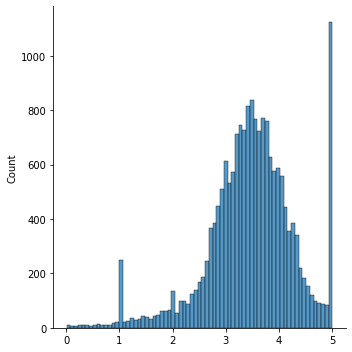

In [23]:
sns.displot(y_predict,)

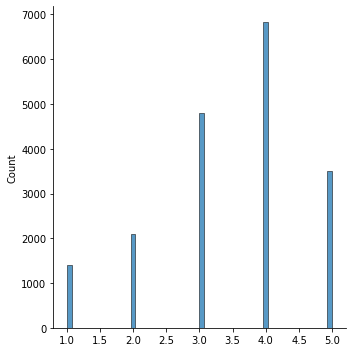

In [24]:
sns.displot(y_true)

In [25]:
for i in user_index_list:
    movie_index_util_list, rating_list = get_movies_rated_by_user(ratings_train_arr, i)
    ridge = Ridge(alpha=500, fit_intercept=True, max_iter=20000, normalize=True)
    tfdif_by_user = tfidf[movie_index_util_list.tolist()]
    
    ridge.fit(tfdif_by_user, rating_list)

    w[:, i] = ridge.coef_
    b[0, i] = ridge.intercept_

C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

In [26]:
import matplotlib.pyplot as plt
Y = tfidf.dot(w)  + b;
Y

array([[4.03026854, 3.64292262, 4.29930787, ..., 3.24874143, 1.66966765,
        4.25191069],
       [4.03008973, 3.64446015, 4.3001214 , ..., 3.24964719, 1.67033116,
        4.25058511],
       [4.03018499, 3.64259309, 4.29937151, ..., 3.24154636, 1.66872911,
        4.24602317],
       ...,
       [4.03005555, 3.64270481, 4.29941466, ..., 3.2527198 , 1.67274225,
        4.25343397],
       [4.02999602, 3.64218026, 4.29944065, ..., 3.2500566 , 1.66949084,
        4.24968765],
       [4.03017471, 3.64289321, 4.29936761, ..., 3.24824433, 1.66928448,
        4.25405055]])

In [27]:
movie_indexes = ratings_test_arr[:, 5]
user_indexes = ratings_test_arr[:, 6]
true_scores = ratings_test_arr[:, 2]

y_true = []
y_predict = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true.append(true_score)
        y_predict.append(Y[movie_index][user_index])
y_predict = [5 if y > 5 else y for y in y_predict]
y_predict = [1 if y < 0 else y for y in y_predict]
y_predict = np.array(y_predict)


In [28]:
y_true = np.array(y_true)
y_true

array([4, 1, 5, ..., 3, 2, 4])

In [29]:
y_predict

array([4.38490311, 3.52335342, 3.7490549 , ..., 4.42648865, 1.88890396,
       3.1300942 ])

In [30]:
class Metrics():
    def computeMSE(y_true, y_pred):
        return np.mean((y_true-y_pred)**2)

    def computeMAE(y_true, y_pred):
        return np.mean(np.abs(y_true-y_pred))

    def computeSIA(y_true, y_pred, eps=1): 
        error = np.abs(y_true - y_pred)
        bina = [1 if err < eps else 0 for err in error]
        res = np.mean(bina)
        return res

In [31]:
#Compute MAE metrics
mae_test = Metrics.computeMAE(y_true, y_predict)
print(mae_test)

0.7682902600731737


In [32]:
#Compute MSE metrics
mse_test = Metrics.computeMSE(y_true, y_predict)
print(mse_test)

0.9921128658521757


In [33]:
#Compute SIA metrics
sia_test_1 = Metrics.computeSIA(y_true, y_predict, 1)
print(sia_test_1)

sia_test_0_5 = Metrics.computeSIA(y_true, y_predict, 0.5)
print(sia_test_0_5)

sia_test_0_25 = Metrics.computeSIA(y_true, y_predict, 0.25)
print(sia_test_0_25)


0.7104189044038668
0.4184747583243824
0.2252953813104189


In [34]:
import math
rmse = 0
for i in range(len(y_predict)):
    rmse += abs(y_predict[i] - y_true[i]) ** 2
print(rmse / len(y_predict))

0.9921128658521757


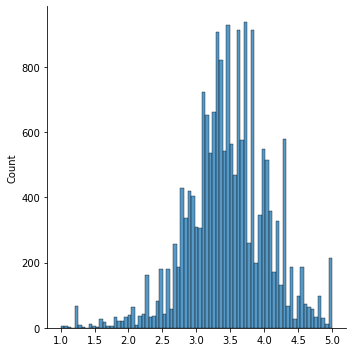

In [35]:
sns.displot(y_predict, )

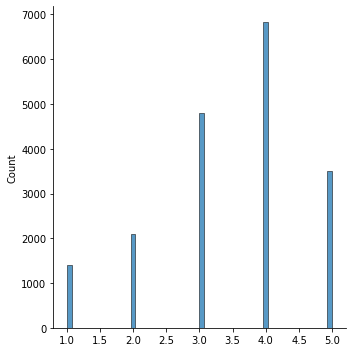

In [36]:
sns.displot(y_true, )

In [37]:
user_alphas = []
for i in user_index_list:
    movie_index_util_list, rating_list = get_movies_rated_by_user(ratings_train_arr, i)
    ridge = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13), fit_intercept=True, normalize=True)
    tfdif_by_user = tfidf[movie_index_util_list.tolist()]
    
    ridge.fit(tfdif_by_user, rating_list)
    user_alphas.append(ridge.alpha_)

    w[:, i] = ridge.coef_
    b[0, i] = ridge.intercept_

C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import

In [38]:
user_alphas

[1000000.0,
 100.0,
 1000000.0,
 1.0,
 1.0,
 10.0,
 10.0,
 1000000.0,
 1000000.0,
 100.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 100.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 10.0,
 10.0,
 100.0,
 10.0,
 1e-06,
 10.0,
 10.0,
 100.0,
 1000000.0,
 1000000.0,
 1000000.0,
 100.0,
 1.0,
 10.0,
 1.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 10.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 100.0,
 1000000.0,
 1.0,
 10.0,
 10.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 100.0,
 100.0,
 10.0,
 1000000.0,
 1000000.0,
 100.0,
 1000000.0,
 1000000.0,
 1.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 10.0,
 10.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 1000000.0,
 10.0,
 1.0,
 1000000.0,
 10.0,
 10.0,
 10.0,
 100.0,
 1000000.0,
 1000000.0,
 10.0,
 1000000.0,
 1000000.0,
 

In [39]:
Y = tfidf.dot(w)  + b;
Y

array([[4.03011591, 3.64385281, 4.29942095, ..., 3.24999937, 1.66666817,
        4.25000096],
       [4.03011582, 3.6514887 , 4.29942136, ..., 3.24999982, 1.66666851,
        4.25000029],
       [4.03011586, 3.6422255 , 4.29942098, ..., 3.24999575, 1.6666677 ,
        4.24999801],
       ...,
       [4.0301158 , 3.64277443, 4.29942101, ..., 3.25000137, 1.66666971,
        4.25000172],
       [4.03011577, 3.64018182, 4.29942102, ..., 3.25000003, 1.66666808,
        4.24999984],
       [4.03011586, 3.64371005, 4.29942098, ..., 3.24999912, 1.66666798,
        4.25000204]])

In [40]:
movie_indexes = ratings_test_arr[:, 5]
user_indexes = ratings_test_arr[:, 6]
true_scores = ratings_test_arr[:, 2]

y_true = []
y_predict = []
import math
for i in range(len(movie_indexes)):
    movie_index = movie_indexes[i]
    user_index = user_indexes[i]
    true_score = true_scores[i]
    if (Y[movie_index][user_index] != 0):
        y_true.append(true_score)
        y_predict.append(Y[movie_index][user_index])
y_predict = [5 if y > 5 else y for y in y_predict]
y_predict = [1 if y < 0 else y for y in y_predict]
y_predict = np.array(y_predict)


In [41]:
y_true = np.array(y_true)
y_true

array([4, 1, 5, ..., 3, 2, 4])

In [42]:
y_predict

array([4.38504148, 3.52974975, 3.74876862, ..., 4.42857038, 1.8888889 ,
       1.00000085])

In [43]:
#Compute MAE metrics
mae_test = Metrics.computeMAE(y_true, y_predict)
print(mae_test)
#Compute MSE metrics
mse_test = Metrics.computeMSE(y_true, y_predict)
print(mse_test)
#Compute SIA metrics
sia_test_1 = Metrics.computeSIA(y_true, y_predict, 1)
print(sia_test_1)

sia_test_0_5 = Metrics.computeSIA(y_true, y_predict, 0.5)
print(sia_test_0_5)

sia_test_0_25 = Metrics.computeSIA(y_true, y_predict, 0.25)
print(sia_test_0_25)


0.7780600498551156
1.033226990333995
0.706015037593985
0.41772287862513424
0.22878625134264233
